In [1]:
import osmnx as ox
import geopandas as gpd
import shapely
import folium

point = [52.4990043, 13.4185569] #(LATITUDE, LONGITUDE) --> GEOPANDAS HAS INSTEAD (Y,X), so (LONGITUDE, LATITUDE)
#streets_graph = ox.graph_from_point(point, dist=500, network_type='drive')

#location = "Berlin, Germany"
#streets_graph = ox.graph_from_address(location, dist=5000, network_type='all')

location = ['Kreuzberg, Berlin']
streets_graph = ox.graph_from_place(location, network_type='drive')

#streets_graph = ox.project_graph(streets_graph)

C:\Users\MarcoLT\anaconda3\envs\ox\lib\site-packages\osmnx\geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


In [2]:
type(streets_graph)

networkx.classes.multidigraph.MultiDiGraph

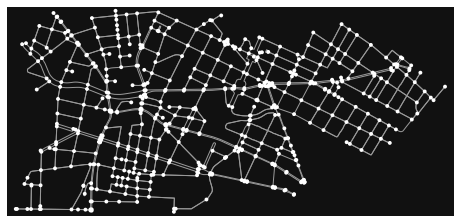

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
ox.plot.plot_graph(streets_graph)

In [4]:
streets = ox.graph_to_gdfs(streets_graph, nodes=False, edges=True,
                                     node_geometry=False, fill_edge_geometry=True)

In [5]:
type(streets)

geopandas.geodataframe.GeoDataFrame

In [6]:
streets

osmid  \
u          v          key                                                      
21306261   21306262   0                       [16114537, 856142942, 4494998]   
           27555102   0    [849540329, 849540330, 858177673, 858177674, 1...   
21306262   27555102   0                                            172219124   
           27555213   0                                            172274268   
           21306261   0                       [16114537, 4494998, 856142942]   
...                                                                      ...   
8901012586 1121856192 0                               [816324772, 962258013]   
8920464606 8920464607 0                                            964402776   
           29720823   0                                              4679304   
8920464607 8920464606 0                                            964402776   
           59905492   0                                            246136582   

                                                         name         highway  \
u          v          key                                                       
21306261   21306262   0                        Ohlauer Straße     residential   
           27555102   0    [Paul-Lincke-Ufer, Forster Straße]   living_street   
21306262   27555102   0                  Reichenberger Straße     residential   
           27555213   0                  Reichenberger Straße     residential   
           21306261   0                        Ohlauer Straße     residential   
...                                                       ...             ...   
8901012586 1121856192 0                            Hasenheide       secondary   
8920464606 8920464607 0                                   NaN  secondary_link   
           29720823   0                            Hasenheide       secondary   
8920464607 8920464606 0                                   NaN  secondary_link   
           59905492   0                            Hasenheide       secondary   

                          maxspeed  oneway   length  \
u          v          key                             
21306261   21306262   0         30   False  215.328   
           27555102   0        NaN   False  409.192   
21306262   27555102   0         30   False  193.927   
           27555213   0         30   False  191.093   
           21306261   0         30   False  215.328   
...                            ...     ...      ...   
8901012586 1121856192 0         50    True  124.075   
8920464606 8920464607 0         50   False   10.183   
           29720823   0         50    True  328.182   
8920464607 8920464606 0         50   False   10.183   
           59905492   0         50    True   34.899   

                                                                    geometry  \
u          v          key                                                      
21306261   21306262   0    LINESTRING (13.42866 52.49389, 13.42870 52.493...   
           27555102   0    LINESTRING (13.42866 52.49389, 13.42879 52.493...   
21306262   27555102   0    LINESTRING (13.43029 52.49555, 13.43044 52.495...   
           27555213   0    LINESTRING (13.43029 52.49555, 13.43014 52.495...   
           21306261   0    LINESTRING (13.43029 52.49555, 13.43019 52.495...   
...                                                                      ...   
8901012586 1121856192 0    LINESTRING (13.41971 52.48741, 13.42013 52.487...   
8920464606 8920464607 0    LINESTRING (13.41458 52.48808, 13.41461 52.48817)   
           29720823   0    LINESTRING (13.41458 52.48808, 13.41557 52.487...   
8920464607 8920464606 0    LINESTRING (13.41461 52.48817, 13.41458 52.48808)   
           59905492   0    LINESTRING (13.41461 52.48817, 13.41442 52.488...   

                            lanes width  ref bridge tunnel access junction  
u          v          key                                                   
21306261   21306262   0       NaN   NaN  NaN    NaN    NaN    NaN

In [7]:
uniteD = streets.unary_union

In [8]:
type(uniteD)

shapely.geometry.multilinestring.MultiLineString

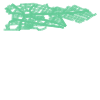

In [9]:
uniteD

In [10]:
convShape = uniteD.convex_hull

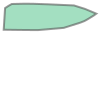

In [11]:
convShape

In [12]:
type(convShape)

shapely.geometry.polygon.Polygon

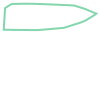

In [13]:
convShape.boundary

In [14]:
type(convShape.boundary)

shapely.geometry.linestring.LineString

In [15]:
from shapely.geometry import Point

In [16]:
myPoint = Point(point[1], point[0]) #(LONGITUDE, LATITUDE)

In [17]:
convShape.contains(myPoint)

True

In [18]:
import folium

In [34]:
m = folium.Map(location=point, width='25%', height='25%', zoom_start=13)

In [35]:
folium.GeoJson(convShape).add_to(m)

In [36]:
folium.GeoJson(myPoint).add_to(m)

In [37]:
m